In [1]:
import numpy as np
import matplotlib.pyplot as plt


import math
import csv
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

import matplotlib as mpl

#matplotlib.verbose.level = 'debug-annoying'
mpl.rcParams.update({'font.size': 16})
import sys
import os

In [2]:
weirdFile = "/mnt/d/Programme/RootReader/RootReader-master/runlogs/weirdEvents.txt"

df = pd.read_csv(weirdFile, skiprows=0, sep="\t", names=["Runname", "weird", "total", "ratio"])

keys = df.columns

df[:50]


,Runname,weird,total,ratio
0,27_2604_night,133,1001,0.132867
1,27_2604_night,160,1001,0.159840
2,27_2604_night,152,1001,0.151848
3,27_2604_night,133,1001,0.132867
4,27_2604_night,116,1001,0.115884
5,27_2604_night,139,1001,0.138861
6,27_2604_night,140,1001,0.139860
7,27_2604_night,138,1001,0.137862
8,29_2904_night,71,501,0.141717
9,29_2904_night,64,501,0.127745


In [11]:
summedDataDay = pd.DataFrame(columns=["Runname", "weird", "total", "ratio"])
summedDataNight = pd.DataFrame(columns=["Runname", "weird", "total", "ratio"])
runBefore = df["Runname"][0]
fileNumber = 0
weirdCounter = 0
totalCounter = 0
ratio = 0
#print(runBefore)

for i, run in enumerate(df["Runname"]):

    
    if run == runBefore:
        fileNumber += 1
        weirdCounter += df["weird"][i]
        totalCounter += df["total"][i]
        runBefore = run
    else:
        #print(run)
        ratio = (weirdCounter*1.0)/totalCounter
        data = [run, weirdCounter, totalCounter, ratio]
        if "day" in run:
            summedDataDay = summedDataDay.append(dict(zip(summedDataDay.columns, data)), 
            ignore_index=True)
            summedDataNight = summedDataNight.append(dict(zip(summedDataDay.columns, [run,None,None,None])), ignore_index=True)
        else:
            summedDataNight = summedDataNight.append(dict(zip(summedDataDay.columns, data)), ignore_index=True)
            summedDataDay = summedDataDay.append(dict(zip(summedDataDay.columns, [run,None,None,None])), ignore_index=True)
        runBefore = run
        fileNumber = 0
        weirdCounter = 0
        totalCounter = 0
        ratio = 0

  #  print(weirdCounter)
  #  print(fileNumber)



hello
hello
hello
hello
hello
hello
hello
hello
hello


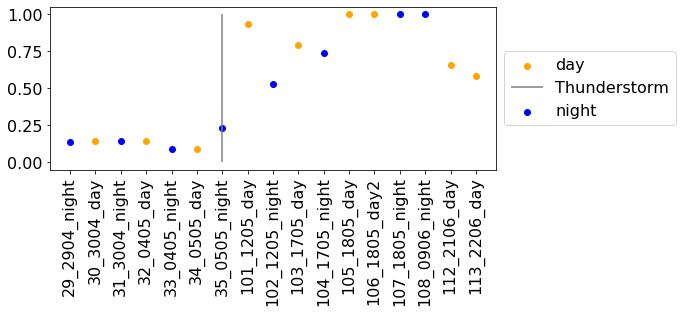

In [19]:
plt.figure(figsize=(8,3))


plt.scatter(summedDataDay["Runname"], summedDataDay["ratio"], label="day", c="orange")
plt.vlines("35_0505_night", 0, 1, colors="grey", label="Thunderstorm")
plt.scatter(summedDataNight["Runname"], summedDataNight["ratio"], label="night", c="blue")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
degrees = 90

plt.xticks(rotation=degrees)
plt.show()

In [21]:
summedDataDay.head(n=20)

,Runname,weird,total,ratio
0,29_2904_night,None,None,NaN
1,30_3004_day,1079,7515,0.143580
2,31_3004_night,None,None,NaN
3,32_0405_day,214,1503,0.142382
4,33_0405_night,None,None,NaN
5,34_0505_day,697,7515,0.092748
6,35_0505_night,None,None,NaN
7,101_1205_day,7035,7515,0.936128
8,102_1205_night,None,None,NaN
9,103_1705_day,5968,7515,0.794145


In [22]:
summedDataNight.head(n=20)

,Runname,weird,total,ratio
0,29_2904_night,1111,8008,0.138736
1,30_3004_day,None,None,NaN
2,31_3004_night,1399,9519,0.146969
3,32_0405_day,None,None,NaN
4,33_0405_night,668,7515,0.088889
5,34_0505_day,None,None,NaN
6,35_0505_night,2179,9519,0.228911
7,101_1205_day,None,None,NaN
8,102_1205_night,5036,9519,0.529047
9,103_1705_day,None,None,NaN
